In [1]:
# !pip install transformers[torch]
# !pip install -U datasets
# !pip install -U transformers
# !pip install -U accelerate
# !pip freeze | grep accelerate
# #Must use GPU

Text(0.5, 1.0, 'Emotion Sentiment Disterbution')

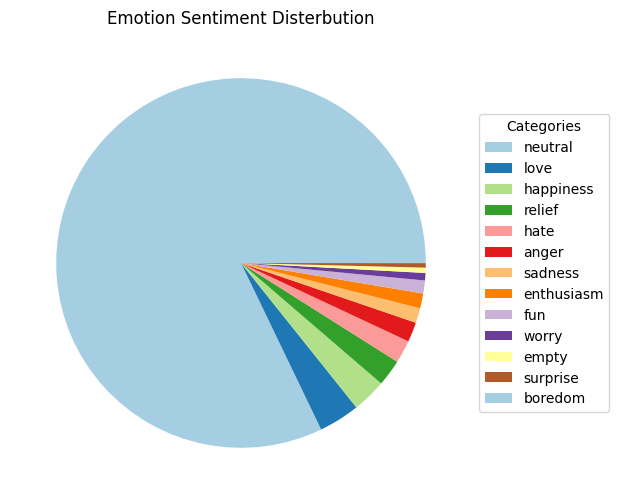

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import os.path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Load the emotion analysis dataset
# dataset_file_name = os.path.join('drive','MyDrive','Colab Notebooks',"emotion_sentiment_dataset.csv")
# dataset_file_name = os.path.join("emotion_sentiment_dataset.csv")\

dataset = pd.read_csv("/Users/shaicahana/Documents/AI_DL/colab/AI-DL/project-3/emotion_sentiment_dataset.csv")
dataset = dataset.head(10000)

###===== Part 1.1 =======
# Draw a pie plot using matplotlib of all the possible emotions
values, counts = np.unique(dataset['Emotion'][:], return_counts=True)
sorted_pairs = sorted(zip(counts, values), reverse=True) # legend by frequency
sizes_sorted, labels_sorted = zip(*sorted_pairs)
colors = sns.color_palette("Paired", len(counts)) # i dont want repeating colors
plt.figure(figsize=(16, 6))  # Make the plot wider
plt.pie(sizes_sorted,colors=colors)
plt.legend(labels_sorted, 
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))  # place legend outside
plt.title('Emotion Sentiment Disterbution')

###=====

Text(0.5, 1.0, 'Emotion Sentiment Distribution')

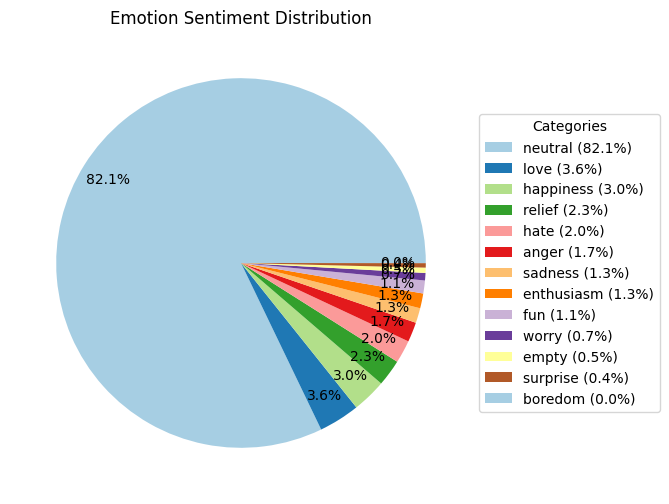

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import os.path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load and prepare the dataset
dataset = pd.read_csv("/Users/shaicahana/Documents/AI_DL/colab/AI-DL/project-3/emotion_sentiment_dataset.csv")
dataset = dataset.head(10000)

###===== Part 1.1 =======
# Draw a pie plot using matplotlib of all the possible emotions
values, counts = np.unique(dataset['Emotion'][:], return_counts=True)
sorted_pairs = sorted(zip(counts, values), reverse=True)  # legend by frequency
sizes_sorted, labels_sorted = zip(*sorted_pairs)

# Calculate percentages
total = sum(sizes_sorted)
percentages = [count/total * 100 for count in sizes_sorted]

# Create labels with percentages for legend
labels_with_pct = [f'{label} ({pct:.1f}%)' for label, pct in zip(labels_sorted, percentages)]

colors = sns.color_palette("Paired", len(counts))  # no repeating colors
plt.figure(figsize=(16, 6))  # Make the plot wider

# Add autopct parameter to display percentages on the pie chart
plt.pie(sizes_sorted, 
        colors=colors, 
        autopct='%1.1f%%',  # Display percentages on pie slices
        pctdistance=0.85)   # Adjust distance of percentage labels from center

plt.legend(labels_with_pct,  # Use new labels with percentages
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))  # place legend outside

plt.title('Emotion Sentiment Distribution')
###=====

In [3]:
dataset.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


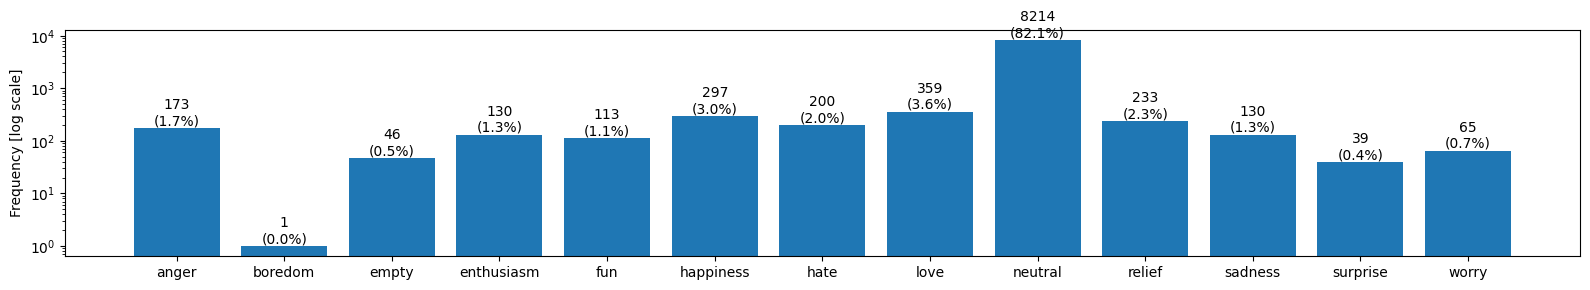

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentages
total = sum(counts)
percentages = [(count/total) * 100 for count in counts]

plt.figure(figsize=(16, 3))  # Make the plot wider

# Create bars
bars = plt.bar(values, counts)
plt.yscale('log')
plt.ylabel('Frequency [log scale]')

# Add percentage labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        percentage = (height/total) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom')

add_labels(bars)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [5]:
# Map emotions to 'neutral' and 'non-neutral'
dataset['Emotion'] = dataset['Emotion'].apply(lambda x: 0 if x == 'neutral' else 1)

In [6]:
import random
import pandas as pd
random.seed(42)
dataset['Type'] = ['Train' if random.random() < 0.8 else 'Test' for _ in dataset['Emotion']]

# Split dataset into train and test sets
train_texts = dataset[dataset['Type'] == "Train" ]['text']
train_labels = dataset[dataset['Type'] == "Train" ]['Emotion']

test_texts = dataset[dataset['Type'] == "Test" ]['text']
test_labels = dataset[dataset['Type'] == "Test" ]['Emotion']

In [7]:
import numpy as np
percent_of_minority_train = np.mean(train_labels)*100
percent_of_minority_test = np.mean(test_labels)*100
print(f" {percent_of_minority_train:.2f}% in training set" )
print(f" {percent_of_minority_test:.2f}% in testing set" )

 17.71% in training set
 18.49% in testing set


In [8]:
# Prepare the dataset for the transformer
train_dataset = Dataset.from_pandas(pd.DataFrame({
    'text': train_texts,
    'label': train_labels
}))
test_dataset = Dataset.from_pandas(pd.DataFrame({
    'text': test_texts,
    'label': test_labels
}))

# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Function to tokenize the dataset
def tokenize_data(example):
    return tokenizer(example['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/8031 [00:00<?, ? examples/s]

Map:   0%|          | 0/1969 [00:00<?, ? examples/s]

In [9]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    logging_dir='./logs',
    do_eval=True,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


OSError: [Errno 30] Read-only file system: './results'

In [ ]:

###===== Part 1.3 =======
## Write a code that calculates the precision and recall on the training and testing dataset
# Function to calculate precision and recall
def compute_precision_recall(predictions, references):

    return None,None
###===== End of part 1.3 =======


# Predict outputs for the training dataset
train_output = trainer.predict(train_dataset)
train_predictions = train_output.predictions.argmax(-1)
train_references = train_output.label_ids

# Predict outputs for the testing dataset
test_output = trainer.predict(test_dataset)
test_predictions = test_output.predictions.argmax(-1)
test_references = test_output.label_ids

# Compute precision and recall for the training dataset
train_precision, train_recall = compute_precision_recall(train_predictions, train_references)
print(f"Training Precision: {train_precision:.4f}, Training Recall: {train_recall:.4f}")

# Compute precision and recall for the testing dataset
test_precision, test_recall = compute_precision_recall(test_predictions, test_references)
print(f"Testing Precision: {test_precision:.4f}, Testing Recall: {test_recall:.4f}")